<a href="https://colab.research.google.com/github/rohanp2051/MalariaPredictionFromSatellite2020/blob/main/Spatio_Temporal_Data_Malaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

plt.savefig after plt.show (dpi set equal to high value), pad (creates or decrease white space around the plot)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/ibadan_malaria-prevalence_dataset_Clean_final_trainingset.csv")
df
columns = ["month","mm-rf","mmP-rf","min-temp","max-temp","x-temp","ndvi"]
df['ndvi'] = pd.to_numeric(df['ndvi'], errors = 'coerce')

In [ ]:
columns_previous = ["mm-rf","mmP-rf","min-temp","max-temp","x-temp","ndvi", "screen_n", "pos_n", "preP"]
pre_df = df.shift(1)[columns_previous]
pre_df.columns = [col+"_previous" for col in columns_previous]
columns_previous = pre_df.columns
pre_df

,mm-rf_previous,mmP-rf_previous,min-temp_previous,max-temp_previous,x-temp_previous,ndvi_previous,screen_n_previous,pos_n_previous,preP_previous
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.1,0.001571,22.1,33.3,27.75,NaN,93.0,42.0,0.45
2,20.9,0.015637,22.6,34.7,28.69,NaN,73.0,34.0,0.47
3,76.0,0.056861,22.5,34.2,28.37,NaN,127.0,19.0,0.15
4,140.9,0.105417,23.2,32.3,27.76,NaN,191.0,26.0,0.14
...,...,...,...,...,...,...,...,...,...
223,322.3,0.223928,25.0,32.0,26.00,0.203222,639.0,187.0,0.29
224,180.9,0.125686,22.0,30.0,24.00,0.155515,438.0,109.0,0.25
225,161.7,0.112346,23.0,32.0,26.00,0.386798,367.0,67.0,0.18
226,101.9,0.070798,24.0,31.0,25.00,0.422786,443.0,72.0,0.16


In [ ]:
full_df = pd.concat([df, pre_df], axis = 1)
full_df = full_df.dropna()
full_df

,year,month,screen_n,mm-rf,mmP-rf,min-temp,max-temp,x-temp,preP,pos_n,ndvi,mm-rf_previous,mmP-rf_previous,min-temp_previous,max-temp_previous,x-temp_previous,ndvi_previous,screen_n_previous,pos_n_previous,preP_previous
50,2000,3,83,97.0,0.073809,22.4,35.8,29.09,0.14,12,0.238432,0.1,0.000076,19.7,34.7,27.22,0.234565,195.0,38.0,0.19
51,2000,4,147,124.5,0.094734,22.9,32.8,27.88,0.27,39,0.316975,97.0,0.073809,22.4,35.8,29.09,0.238432,83.0,12.0,0.14
52,2000,5,297,88.3,0.067189,22.6,32.0,27.31,0.30,89,0.586389,124.5,0.094734,22.9,32.8,27.88,0.316975,147.0,39.0,0.27
53,2000,6,258,165.4,0.125856,21.7,30.1,25.94,0.21,53,0.594888,88.3,0.067189,22.6,32.0,27.31,0.586389,297.0,89.0,0.30
54,2000,7,302,233.1,0.177370,21.4,28.4,24.93,0.35,106,0.601006,165.4,0.125856,21.7,30.1,25.94,0.594888,258.0,53.0,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,2014,8,438,180.9,0.125686,22.0,30.0,24.00,0.25,109,0.155515,322.3,0.223928,25.0,32.0,26.00,0.203222,639.0,187.0,0.29
224,2014,9,367,161.7,0.112346,23.0,32.0,26.00,0.18,67,0.386798,180.9,0.125686,22.0,30.0,24.00,0.155515,438.0,109.0,0.25
225,2014,10,443,101.9,0.070798,24.0,31.0,25.00,0.16,72,0.422786,161.7,0.112346,23.0,32.0,26.00,0.386798,367.0,67.0,0.18
226,2014,11,541,45.6,0.031682,24.0,34.0,27.00,0.15,79,0.341855,101.9,0.070798,24.0,31.0,25.00,0.422786,443.0,72.0,0.16


In [ ]:
corrs = full_df.corr()
mask = np.logical_and(np.logical_or(corrs>0.7, corrs<-0.7), np.eye(len(corrs))!=1)
high_corr = corrs[mask][mask.sum(axis=1)>0].T[mask.sum(axis=0)>0]

corr_groups = []
for i, col_i in enumerate(high_corr.columns):
    for j, col_j in enumerate(high_corr.columns):
        if high_corr.iloc[i,j] < np.inf:
            pair = set([col_i, col_j])
            flag = False
            for index, group in enumerate(corr_groups):
                if pair.intersection(group):
                    corr_groups[index] = group.union(pair)
                    flag = True
            if flag == False:
                corr_groups.append(pair)

for group in corr_groups:
    print(full_df[list(group)].corr())

                   screen_n_previous  screen_n
screen_n_previous           1.000000  0.704485
screen_n                    0.704485  1.000000
          mmP-rf     mm-rf
mmP-rf  1.000000  0.972811
mm-rf   0.972811  1.000000
                     x-temp  x-temp_previous  max-temp_previous  max-temp
x-temp             1.000000         0.703287           0.727166  0.863344
x-temp_previous    0.703287         1.000000           0.860103  0.658470
max-temp_previous  0.727166         0.860103           1.000000  0.785914
max-temp           0.863344         0.658470           0.785914  1.000000
               preP_previous      preP
preP_previous       1.000000  0.764968
preP                0.764968  1.000000
                 mmP-rf_previous  mm-rf_previous
mmP-rf_previous          1.00000         0.97287
mm-rf_previous           0.97287         1.00000


In [ ]:
x = pd.get_dummies(full_df[list(columns) + list(columns_previous)], columns = ["month"])
x.isna().sum()
y = full_df[["screen_n", "pos_n", "preP"]]

In [ ]:
x.corrwith(y['pos_n'])

mm-rf                0.404107
mmP-rf               0.402903
min-temp            -0.292632
max-temp            -0.592390
x-temp              -0.584878
ndvi                 0.140128
mm-rf_previous       0.432533
mmP-rf_previous      0.436915
min-temp_previous   -0.150648
max-temp_previous   -0.523827
x-temp_previous     -0.491010
ndvi_previous        0.221194
screen_n_previous    0.264475
pos_n_previous       0.537120
preP_previous        0.355558
month_1             -0.040777
month_2             -0.247477
month_3             -0.259293
month_4             -0.256009
month_5              0.030607
month_6              0.161015
month_7              0.311594
month_8              0.270783
month_9              0.197135
month_10             0.018880
month_11            -0.034597
month_12            -0.160783
dtype: float64

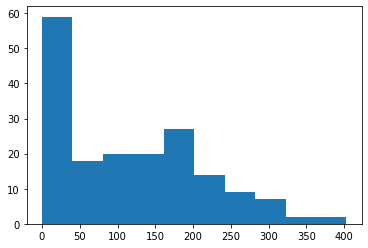

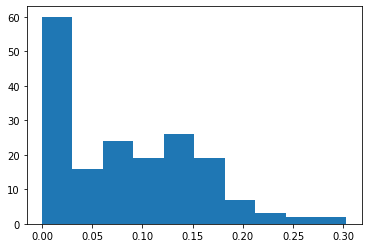

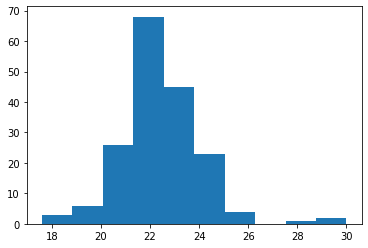

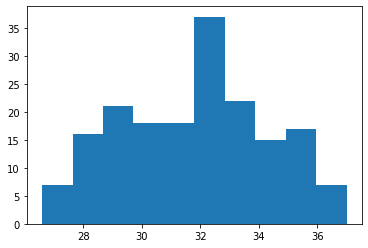

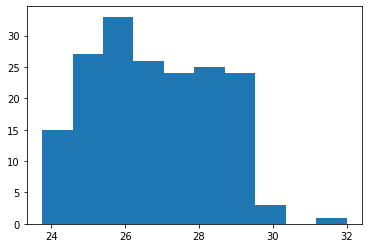

(array([ 4.,  4., 17., 24., 21., 29., 21., 29., 18., 11.]),
 array([0.10563096, 0.16232915, 0.21902735, 0.27572554, 0.33242373,
        0.38912193, 0.44582012, 0.50251832, 0.55921651, 0.6159147 ,
        0.6726129 ]),
 <a list of 10 Patch objects>)

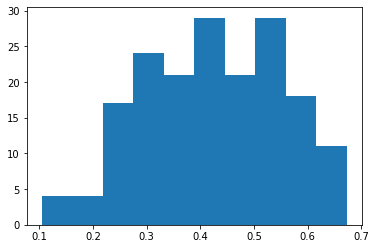

In [ ]:
plt.hist(x["mm-rf"])
plt.show()
plt.hist(x["mmP-rf"])
plt.show()
plt.hist(x["min-temp"])
plt.show()
plt.hist(x["max-temp"])
plt.show()
plt.hist(x["x-temp"])
plt.show()
plt.hist(x["ndvi"])

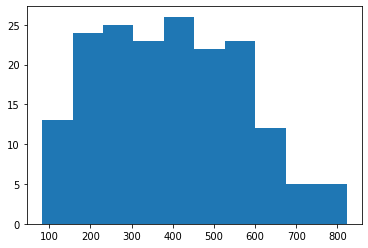

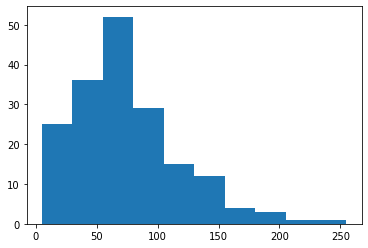

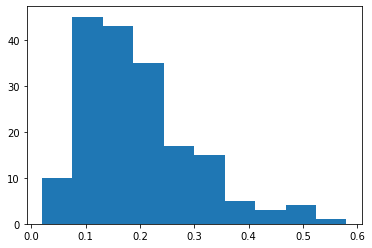

In [ ]:
plt.hist(y["screen_n"])
plt.show()
plt.hist(y["pos_n"])
plt.show()
plt.hist(y["preP"])
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Scaling


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 5)

In [ ]:
xscaler = MinMaxScaler()
yscaler = MinMaxScaler()
xscaler.fit(xtrain)
yscaler.fit(ytrain)
xtrain = xscaler.transform(xtrain)
ytrain = yscaler.transform(ytrain)
xtest = xscaler.transform(xtest)
ytest = yscaler.transform(ytest)

In [ ]:
linearmodel = LinearRegression()
linearmodel.fit(xtrain, ytrain)
pred_linear = linearmodel.predict(xtest)
mean_squared_error(ytest, pred_linear)

0.03505984555522984

Note: Demo to see how the model preforms with the full data

In [ ]:
def plot(y, pred, i, label, std = [134, 43, .06]):
  plt.plot(np.arange(len(y)), y.values[:,i])
  if len(y) <= 48:
    plt.plot(np.arange(len(y)), pred[:,i] + 2*std[i])
    plt.plot(np.arange(len(y)), pred[:,i] - 2*std[i])
    plt.legend(['actual', 'predicted upper bound', 'predicted lower bound'])
  else:
    plt.plot(np.arange(len(y)), pred[:,i])
    plt.legend(['actual', 'predicted'])
  plt.xlabel('month')
  plt.ylabel(label)
  plt.show()
  plt.scatter(y.values[:,i], pred[:,i])
  plt.xlabel('true ' + label)
  plt.ylabel('predicted ' + label)
  plt.show()
  plt.scatter(y.values[:,i], y.values[:,i] - pred[:,i])
  plt.xlabel('true ' + label)
  plt.ylabel('error ' + label)
  plt.show()

In [ ]:
def save_plot(y, pred, i, label, png, std = [134, 43, .06]):
  plt.plot(np.arange(len(y)), y.values[:,i])
  if len(y) <= 48:
    plt.plot(np.arange(len(y)), pred[:,i] + 2*std[i])
    plt.plot(np.arange(len(y)), pred[:,i] - 2*std[i])
  else:
    plt.plot(np.arange(len(y)), pred[:,i])
    plt.legend(['actual', 'predicted'])
  plt.xlabel('month')
  plt.ylabel(label)
  plt.savefig(png, dpi = 600)
  plt.show()
  plt.scatter(y.values[:,i], pred[:,i])
  plt.xlabel('true ' + label)
  plt.ylabel('predicted ' + label)
  plt.show()
  plt.scatter(y.values[:,i], y.values[:,i] - pred[:,i])
  plt.xlabel('true ' + label)
  plt.ylabel('error ' + label)
  plt.show()

In [ ]:
xscaled = xscaler.transform(x)
pred_scaled = linearmodel.predict(xscaled)
pred = yscaler.inverse_transform(pred_scaled)

In [ ]:
pred_scaled = linearmodel.predict(xtest)
pred_test = yscaler.inverse_transform(pred_scaled)
y_unscaled = yscaler.inverse_transform(ytest)
print(np.sqrt(mean_squared_error(y_unscaled[:, 0], pred_test[:, 0])))
print(np.sqrt(mean_squared_error(y_unscaled[:, 1], pred_test[:, 1])))
print(np.sqrt(mean_squared_error(y_unscaled[:, 2], pred_test[:, 2])))

131.42353379969651
45.4799823377845
0.07065508275260218


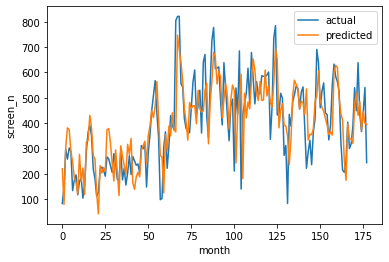

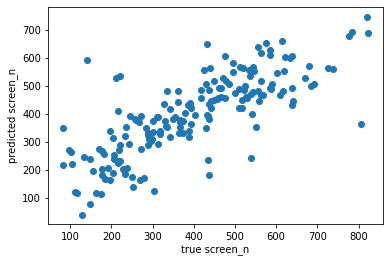

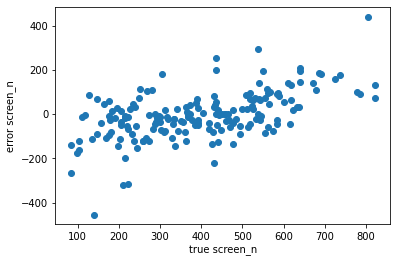

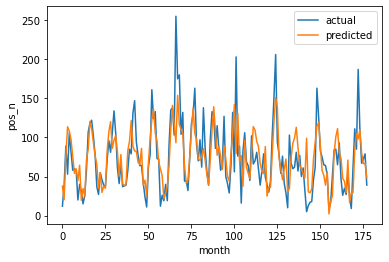

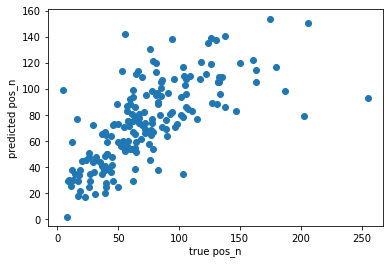

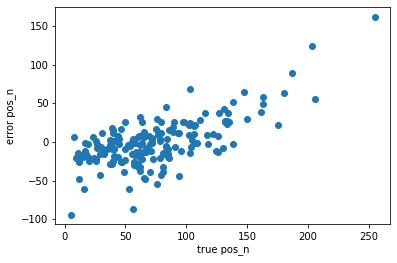

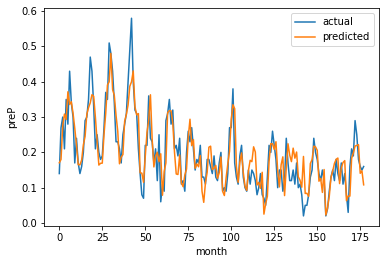

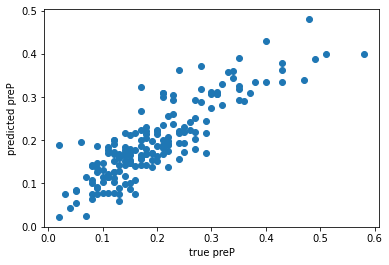

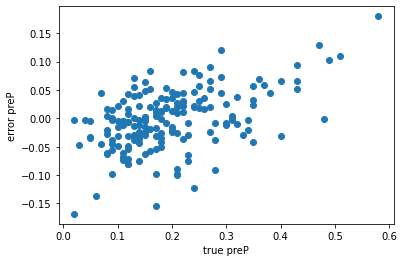

In [ ]:
plot(y, pred, 0, 'screen_n')
plot(y, pred, 1, 'pos_n')
plot(y, pred, 2, 'preP')

In [ ]:
for name,coeff in zip(x.columns, linearmodel.coef_.T):
  print(name, coeff)

mm-rf [0.2309452  0.09430697 0.00739597]
mmP-rf [-0.35987957 -0.20564861 -0.01257543]
min-temp [0.14018782 0.15225679 0.06277425]
max-temp [-0.01607197 -0.12538224 -0.15180041]
x-temp [-0.17126139 -0.0851986   0.04073294]
ndvi [ 0.11914667  0.02540207 -0.02017521]
mm-rf_previous [-0.16906052 -0.08777435  0.01549923]
mmP-rf_previous [0.15119089 0.01229311 0.03989715]
min-temp_previous [-0.05991699 -0.03298631 -0.00047678]
max-temp_previous [-0.08721641 -0.06415252 -0.05998531]
x-temp_previous [-0.05002137 -0.17995875 -0.09417814]
ndvi_previous [-0.00775292  0.06414794  0.12830991]
screen_n_previous [ 0.60684904 -0.03372806 -0.195228  ]
pos_n_previous [ 0.18637848  0.61131278 -0.05146548]
preP_previous [-0.31874178 -0.0662373   0.61622255]
month_1 [0.10611132 0.07949584 0.06165621]
month_2 [-0.009711   -0.13392075 -0.08726091]
month_3 [ 0.04381708 -0.00631697  0.01496694]
month_4 [-0.07319955 -0.01819187  0.03892886]
month_5 [0.13938757 0.13591841 0.04013833]
month_6 [0.08876101 0.151408

In [ ]:
from sklearn.linear_model import Lasso, Ridge
lasso_model = Lasso(alpha=1e-2)
lasso_model.fit(xtrain, ytrain)
pred_linear = lasso_model.predict(xtest)
mean_squared_error(ytest, pred_linear)

0.03131552562560277

In [ ]:
pred_test = yscaler.inverse_transform(pred_linear)
y_unscaled = yscaler.inverse_transform(ytest)
print(np.sqrt(mean_squared_error(y_unscaled[:, 0], pred_test[:, 0])))
print(np.sqrt(mean_squared_error(y_unscaled[:, 1], pred_test[:, 1])))
print(np.sqrt(mean_squared_error(y_unscaled[:, 2], pred_test[:, 2])))

119.22630625071947
41.27058398121044
0.07665266975621399


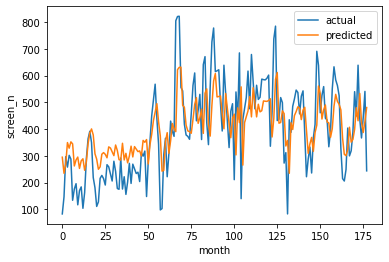

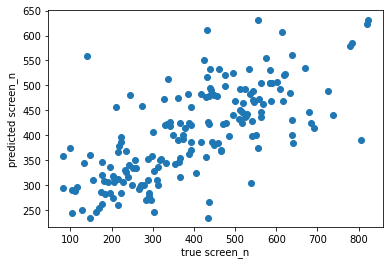

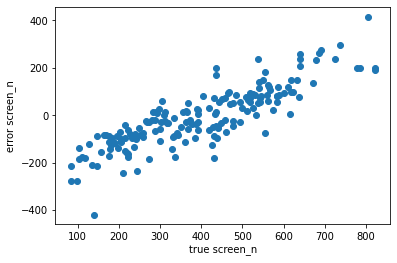

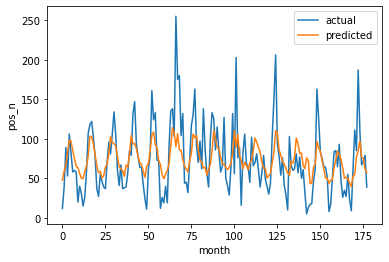

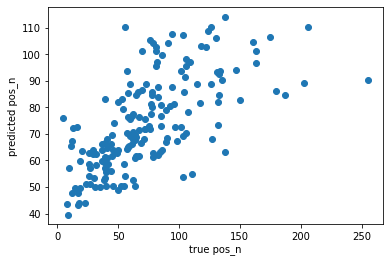

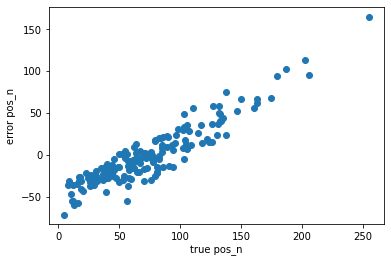

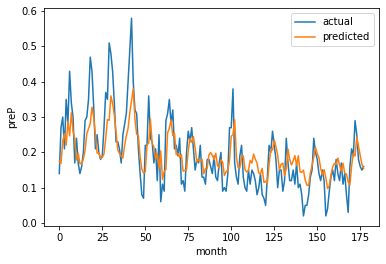

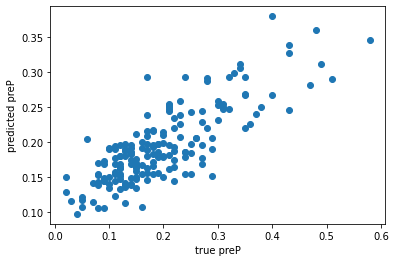

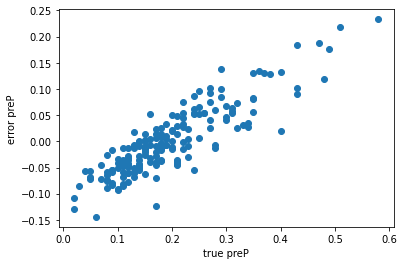

In [ ]:
xscaled = xscaler.transform(x)
pred_scaled = lasso_model.predict(xscaled)
pred = yscaler.inverse_transform(pred_scaled)
plot(y, pred, 0, 'screen_n')
plot(y, pred, 1, 'pos_n')
plot(y, pred, 2, 'preP')

In [ ]:
for name,coeff in zip(x.columns, lasso_model.coef_.T):
  print(name, coeff)

mm-rf [0. 0. 0.]
mmP-rf [0. 0. 0.]
min-temp [-0. -0. -0.]
max-temp [-0.         -0.26282247 -0.10694073]
x-temp [-0. -0. -0.]
ndvi [0. 0. 0.]
mm-rf_previous [0. 0. 0.]
mmP-rf_previous [0. 0. 0.]
min-temp_previous [ 0. -0. -0.]
max-temp_previous [-0. -0. -0.]
x-temp_previous [-0. -0. -0.]
ndvi_previous [0. 0. 0.]
screen_n_previous [ 0.53663147  0.         -0.02474192]
pos_n_previous [0.         0.17324431 0.        ]
preP_previous [-0.          0.          0.46482776]
month_1 [0. 0. 0.]
month_2 [-0.         -0.         -0.00704522]
month_3 [-0. -0. -0.]
month_4 [-0. -0. -0.]
month_5 [0. 0. 0.]
month_6 [0.         0.00058376 0.        ]
month_7 [0.         0.05845297 0.        ]
month_8 [-0.  0.  0.]
month_9 [-0.  0.  0.]
month_10 [ 0. -0. -0.]
month_11 [-0. -0.  0.]
month_12 [-0. -0. -0.]


In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_model =  DecisionTreeRegressor(max_depth = 3)
decision_tree_model.fit(xtrain, ytrain)
pred_decision_tree = decision_tree_model.predict(xtest)
mean_squared_error(ytest, pred_decision_tree)

0.040935973933405166

In [ ]:
pred_scaled = decision_tree_model.predict(xtest)
pred_test = yscaler.inverse_transform(pred_scaled)
y_unscaled = yscaler.inverse_transform(ytest)
print(np.sqrt(mean_squared_error(y_unscaled[:, 0], pred_test[:, 0])))
print(np.sqrt(mean_squared_error(y_unscaled[:, 1], pred_test[:, 1])))
print(np.sqrt(mean_squared_error(y_unscaled[:, 2], pred_test[:, 2])))

141.41735698856422
44.80268193810047
0.0916537979415313


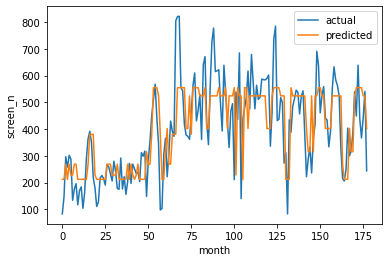

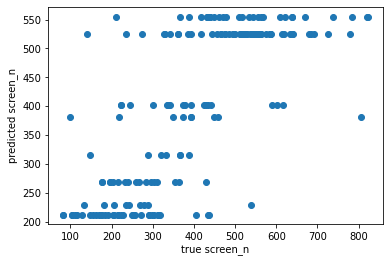

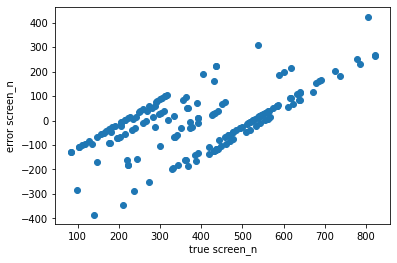

In [ ]:
xscaled = xscaler.transform(x)
pred_scaled = decision_tree_model.predict(xscaled)
pred = yscaler.inverse_transform(pred_scaled)
plot(y, pred, 0, 'screen_n')

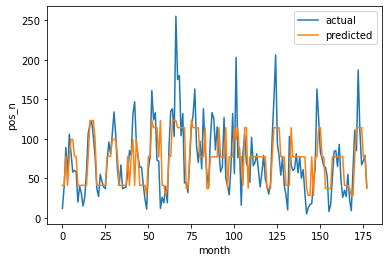

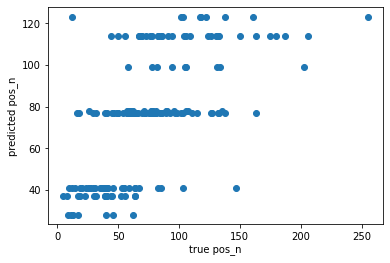

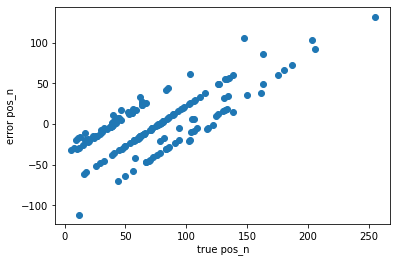

In [ ]:
plot(y, pred, 1, 'pos_n')

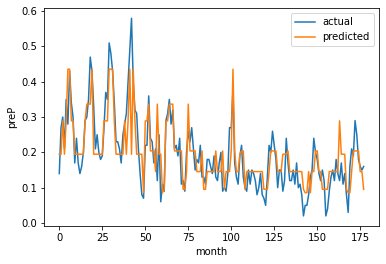

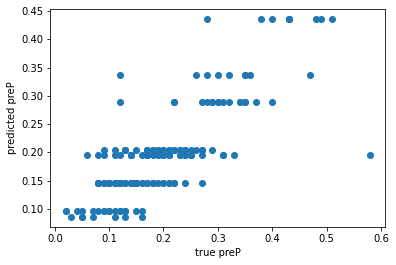

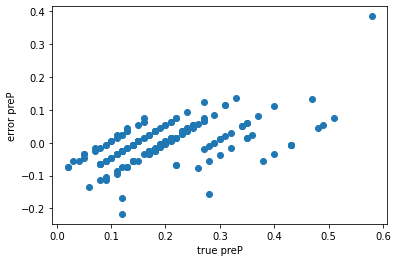

In [ ]:
plot(y, pred, 2, 'preP')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model =  RandomForestRegressor(max_depth = 3)
rf_model.fit(xtrain, ytrain)
pred_rf = rf_model.predict(xtest)
mean_squared_error(ytest, pred_rf)

0.02993704380537154

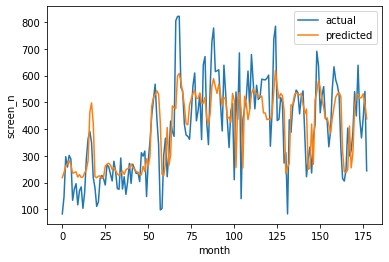

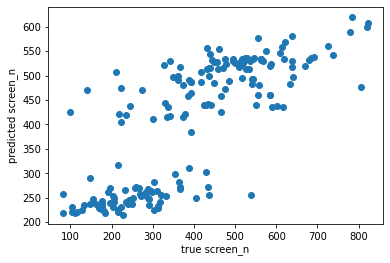

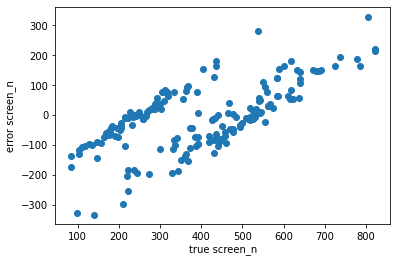

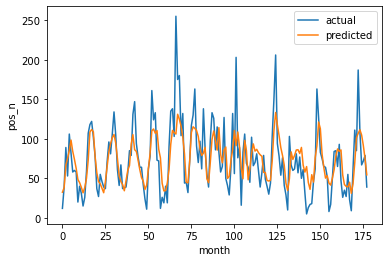

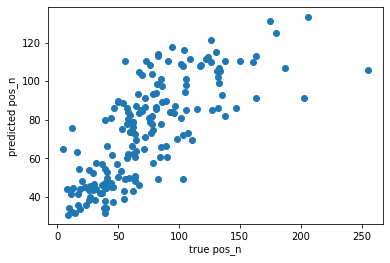

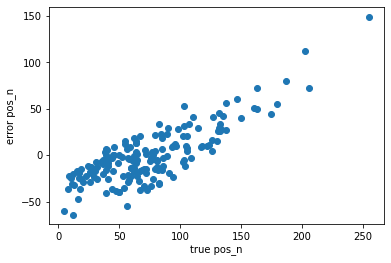

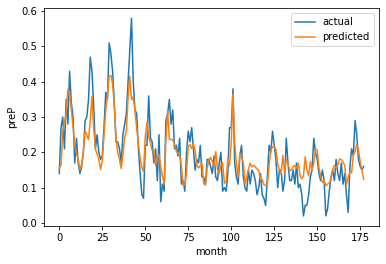

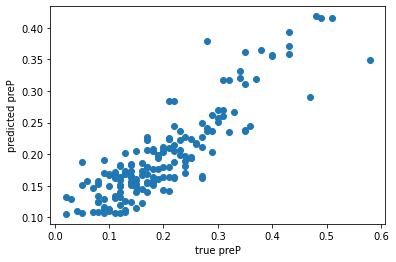

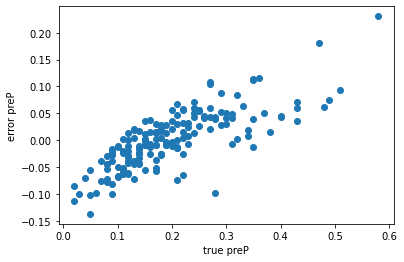

In [ ]:
xscaled = xscaler.transform(x)
pred_scaled = rf_model.predict(xscaled)
pred = yscaler.inverse_transform(pred_scaled)
plot(y, pred, 0, 'screen_n')
plot(y, pred, 1, 'pos_n')
plot(y, pred, 2, 'preP')

In [ ]:
pred_scaled = rf_model.predict(xtest)
pred_test = yscaler.inverse_transform(pred_scaled)
y_unscaled = yscaler.inverse_transform(ytest)
print(np.sqrt(mean_squared_error(y_unscaled[:, 0], pred_test[:, 0])))
print(np.sqrt(mean_squared_error(y_unscaled[:, 1], pred_test[:, 1])))
print(np.sqrt(mean_squared_error(y_unscaled[:, 2], pred_test[:, 2]))),

128.38328554807836
40.264766449728285
0.06624300023168238


(None,)

Neural Net

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

In [ ]:
n_hidden = 5 #5-20

input_ = Input(shape=(x.shape[-1],))
lay1 = Dense(n_hidden, activation='elu', kernel_regularizer=l2(1e-4))(input_)
lay2 = Dense(n_hidden, activation='elu', kernel_regularizer=l2(1e-4))(lay1)
pred = Dense(y.shape[-1])(lay2)

optimizer = Adam(lr=0.001) #0.1, 0.01, 0.001, 0.0001

model_1hidden = Model(inputs=input_, outputs=pred)
model_1hidden.compile(loss='mse', optimizer = optimizer)
#Play with by magnitude
model_1hidden.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 27)]              0         
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 140       
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 18        
Total params: 188
Trainable params: 188
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stop_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=100,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)
model_1hidden.fit(xtrain, ytrain, epochs = 1000, validation_data = (xtest, ytest), callbacks = [early_stop_callback])

Epoch 1/1000
5/5 [==============================] - 1s 37ms/step - loss: 0.1980 - val_loss: 0.1639
Epoch 2/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.1786 - val_loss: 0.1378
Epoch 3/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.1380 - val_loss: 0.1194
Epoch 4/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.1168 - val_loss: 0.1066
Epoch 5/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.1072 - val_loss: 0.0977
Epoch 6/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.0970 - val_loss: 0.0911
Epoch 7/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.0901 - val_loss: 0.0863
Epoch 8/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.0793 - val_loss: 0.0824
Epoch 9/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.0796 - val_loss: 0.0795
Epoch 10/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.0751 - val_loss: 0.0765
Epoch 11/1000


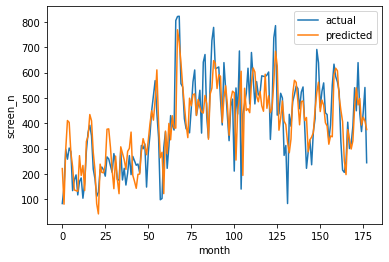

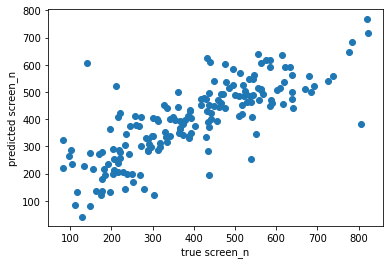

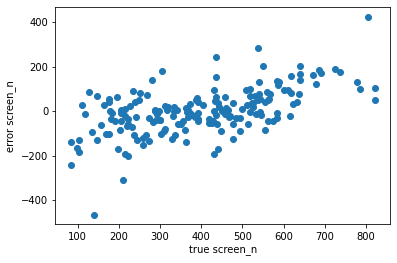

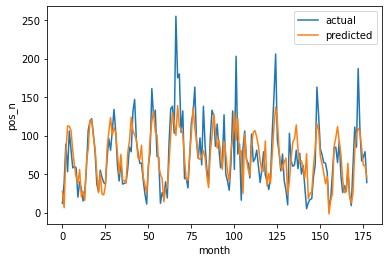

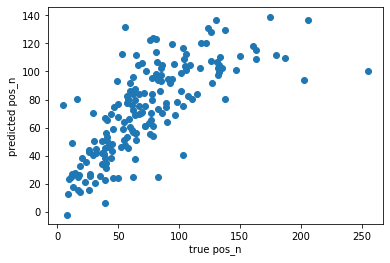

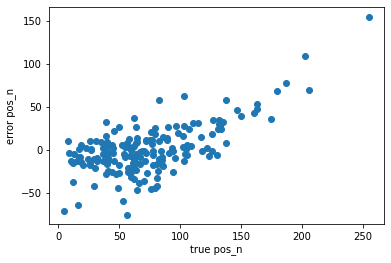

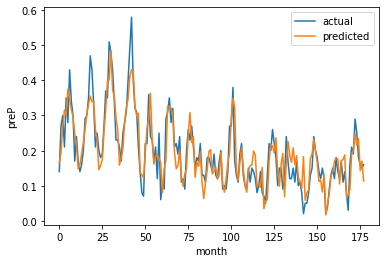

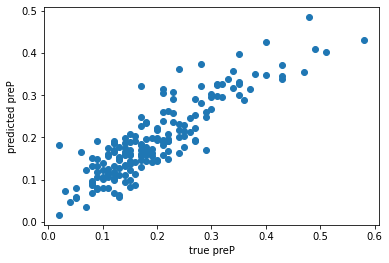

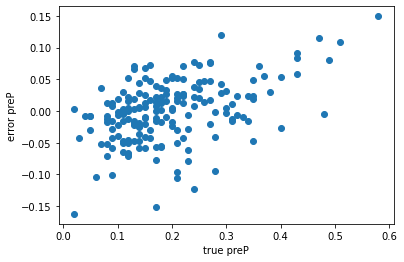

2/2 [==============================] - 0s 7ms/step - loss: 0.0312


0.03119201771914959

In [ ]:
xscaled = xscaler.transform(x)
scalepred = model_1hidden.predict(xscaled)
pred = yscaler.inverse_transform(scalepred)
plot(y, pred, 0, 'screen_n')
plot(y, pred, 1, 'pos_n')
plot(y, pred, 2, 'preP')
model_1hidden.evaluate(xtest, ytest)

In [ ]:
pred_scaled = model_1hidden.predict(xtest)
pred_test = yscaler.inverse_transform(pred_scaled)
y_unscaled = yscaler.inverse_transform(ytest)
print(np.sqrt(mean_squared_error(y_unscaled[:, 0], pred_test[:, 0])))
print(np.sqrt(mean_squared_error(y_unscaled[:, 1], pred_test[:, 1])))
print(np.sqrt(mean_squared_error(y_unscaled[:, 2], pred_test[:, 2])))

124.86087521941322
41.422004234655034
0.06601419142936663


In [ ]:
models = [linearmodel,lasso_model, decision_tree_model, rf_model, model_1hidden]
pred = np.concatenate([model.predict(xtest) for model in models], axis = 1)
print(pred)
additive_model = Ridge(1e-3)
additive_model.fit(pred, ytest)

[[ 0.32318195  0.56638237  0.75704949  0.33333968  0.478639    0.55748951
   0.25169147  0.35275835  0.54945055  0.24784254  0.43434186  0.69832746
   0.30080944  0.58307099  0.76961631]
 [ 0.38199613  0.43056419  0.53582751  0.4161218   0.41492831  0.46418313
   0.40279657  0.58164983  0.6462585   0.53253586  0.49514237  0.43958967
   0.40286827  0.46632481  0.56396765]
 [ 0.40361635  0.53349371  0.58905322  0.36093372  0.38053899  0.47541743
   0.17483085  0.16747475  0.35673469  0.25393865  0.33925844  0.53868633
   0.44326407  0.52746266  0.60310256]
 [ 0.40330589  0.52183387  0.62562957  0.42991883  0.47839289  0.50411337
   0.40279657  0.58164983  0.6462585   0.56159775  0.52374555  0.44174128
   0.44168222  0.56641912  0.63605803]
 [ 0.50299922  0.28555896  0.36934383  0.53521187  0.37041566  0.29228421
   0.59714329  0.34927048  0.25623583  0.6019924   0.37101103  0.27517028
   0.42037648  0.28974012  0.3377094 ]
 [ 0.42627949  0.31801307  0.31966433  0.32607809  0.21316083  0.

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
pred_scaled = additive_model.predict(pred)
pred_test = yscaler.inverse_transform(pred_scaled)
y_unscaled = yscaler.inverse_transform(ytest)
print(np.sqrt(mean_squared_error(y_unscaled[:, 0], pred_test[:, 0])))
print(np.sqrt(mean_squared_error(y_unscaled[:, 1], pred_test[:, 1])))
print(np.sqrt(mean_squared_error(y_unscaled[:, 2], pred_test[:, 2])))

82.36308189015053
26.938844856691706
0.041667831266002806


Validation Set

In [ ]:
df_validation = pd.read_csv("/content/ibadan_malaria-prevalence_dataset_Clean_final_validationset.csv")
df_validation
df_validation['ndvi'] = pd.to_numeric(df_validation['ndvi'], errors = 'coerce')

columns_previous = ["mm-rf","mmP-rf","min-temp","max-temp","x-temp","ndvi", "screen_n", "pos_n", "preP"]
pre_df_validation = df_validation.shift(1)[columns_previous]
pre_df_validation.columns = [col+"_previous" for col in columns_previous]
columns_previous = pre_df_validation.columns
pre_df_validation

,mm-rf_previous,mmP-rf_previous,min-temp_previous,max-temp_previous,x-temp_previous,ndvi_previous,screen_n_previous,pos_n_previous,preP_previous
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.00,0.00,19.63,33.21,26.42,0.291422,74.0,11.0,0.148649
2,37.95,0.03,24.02,34.61,29.31,0.260615,197.0,21.0,0.106599
3,62.90,0.05,24.15,34.96,29.56,0.293978,354.0,49.0,0.138418
4,115.55,0.09,23.54,34.08,28.81,0.287214,361.0,77.0,0.213296
5,159.40,0.12,23.12,32.49,27.81,0.440916,52.0,9.0,0.173077
6,207.65,0.16,22.60,29.96,26.28,0.527871,57.0,11.0,0.192982
7,137.35,0.11,22.29,29.11,25.70,0.122539,78.0,20.0,0.256410
8,98.35,0.08,22.23,28.42,25.33,0.153073,131.0,25.0,0.190840
9,329.70,0.26,21.95,28.98,25.47,0.180349,374.0,75.0,0.200535


In [ ]:
full_df_validation = pd.concat([df_validation, pre_df_validation], axis = 1)
full_df_validation = full_df_validation.dropna()
full_df_validation

,year,month,screen_n,mm-rf,mmP-rf,min-temp,max-temp,x-temp,preP,pos_n,ndvi,mm-rf_previous,mmP-rf_previous,min-temp_previous,max-temp_previous,x-temp_previous,ndvi_previous,screen_n_previous,pos_n_previous,preP_previous
1,2015,2,197,37.95,0.03,24.02,34.61,29.31,0.106599,21,0.260615,0.00,0.00,19.63,33.21,26.42,0.291422,74.0,11.0,0.148649
2,2015,3,354,62.90,0.05,24.15,34.96,29.56,0.138418,49,0.293978,37.95,0.03,24.02,34.61,29.31,0.260615,197.0,21.0,0.106599
3,2015,4,361,115.55,0.09,23.54,34.08,28.81,0.213296,77,0.287214,62.90,0.05,24.15,34.96,29.56,0.293978,354.0,49.0,0.138418
4,2015,5,52,159.40,0.12,23.12,32.49,27.81,0.173077,9,0.440916,115.55,0.09,23.54,34.08,28.81,0.287214,361.0,77.0,0.213296
5,2015,6,57,207.65,0.16,22.60,29.96,26.28,0.192982,11,0.527871,159.40,0.12,23.12,32.49,27.81,0.440916,52.0,9.0,0.173077
6,2015,7,78,137.35,0.11,22.29,29.11,25.70,0.256410,20,0.122539,207.65,0.16,22.60,29.96,26.28,0.527871,57.0,11.0,0.192982
7,2015,8,131,98.35,0.08,22.23,28.42,25.33,0.190840,25,0.153073,137.35,0.11,22.29,29.11,25.70,0.122539,78.0,20.0,0.256410
8,2015,9,374,329.70,0.26,21.95,28.98,25.47,0.200535,75,0.180349,98.35,0.08,22.23,28.42,25.33,0.153073,131.0,25.0,0.190840
9,2015,10,366,124.75,0.10,22.47,30.77,26.62,0.202186,74,0.568160,329.70,0.26,21.95,28.98,25.47,0.180349,374.0,75.0,0.200535
10,2015,11,492,9.85,0.01,23.12,32.25,27.68,0.184959,91,0.529204,124.75,0.10,22.47,30.77,26.62,0.568160,366.0,74.0,0.202186


In [ ]:
x_val = pd.get_dummies(full_df_validation[list(columns) + list(columns_previous)], columns = ["month"])
x_val.isna().sum()
y_val = full_df_validation[["screen_n", "pos_n", "preP"]]
x_val_scaled = xscaler.transform(x_val)
y_val_scaled = yscaler.transform(y_val)

139.81028505604033
38.09666644037611
0.06991491693759896


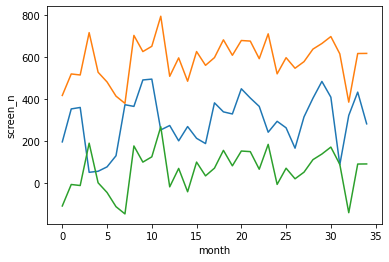

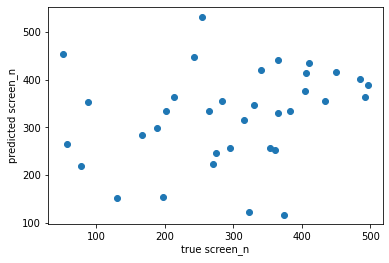

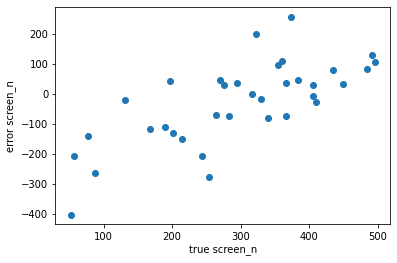

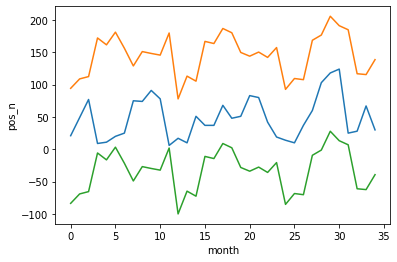

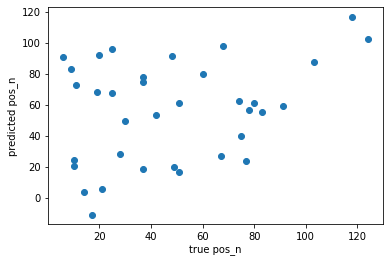

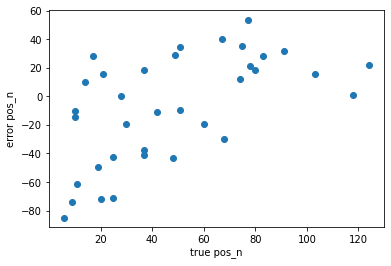

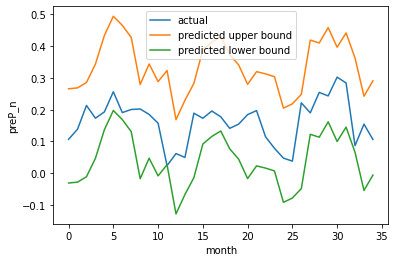

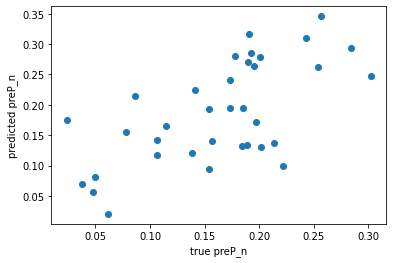

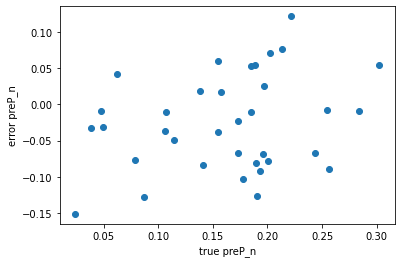

In [ ]:
pred_scaled = model_1hidden.predict(x_val_scaled)
pred_test = yscaler.inverse_transform(pred_scaled)
print(np.sqrt(mean_squared_error(y_val.iloc[:, 0], pred_test[:, 0])))
print(np.sqrt(mean_squared_error(y_val.iloc[:, 1], pred_test[:, 1])))
print(np.sqrt(mean_squared_error(y_val.iloc[:, 2], pred_test[:, 2])))
save_plot(y_val, pred_test, 0, "screen_n", 'model1_screen.png', [131.64,44.46,0.0742])
save_plot(y_val, pred_test, 1, "pos_n", 'model1_pos.png', [131.64,44.46,0.0742])
plot(y_val, pred_test, 2, "preP_n", [131.64,44.46,0.0742])

121.22055679574656
35.6265101983279
0.058415431071229436


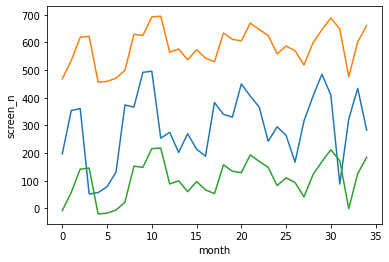

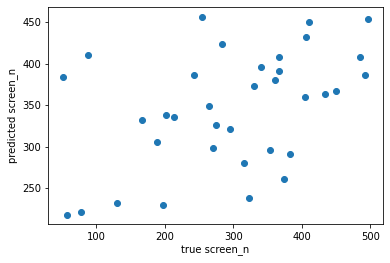

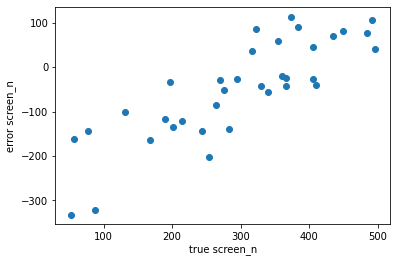

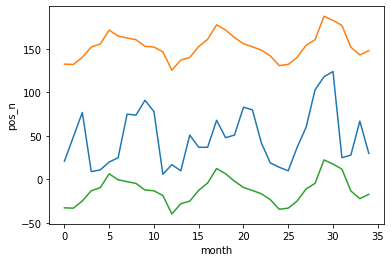

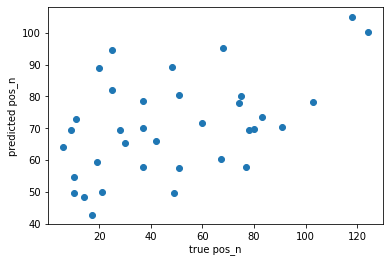

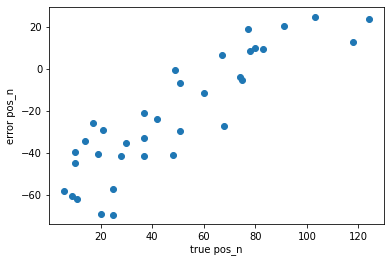

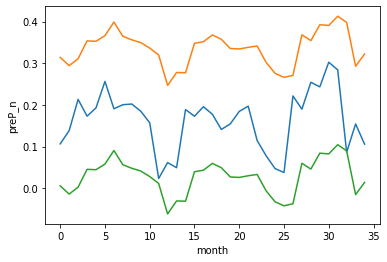

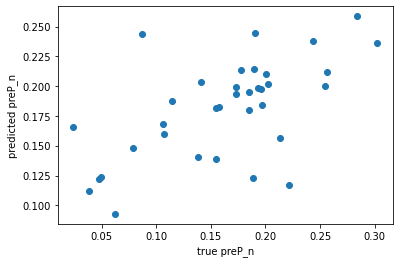

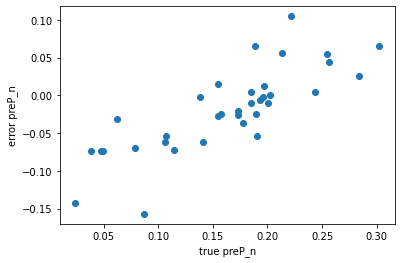

In [ ]:
pred_scaled = lasso_model.predict(x_val_scaled)
pred_test = yscaler.inverse_transform(pred_scaled)
print(np.sqrt(mean_squared_error(y_val.iloc[:, 0], pred_test[:, 0])))
print(np.sqrt(mean_squared_error(y_val.iloc[:, 1], pred_test[:, 1])))
print(np.sqrt(mean_squared_error(y_val.iloc[:, 2], pred_test[:, 2])))
save_plot(y_val, pred_test, 0, "screen_n", 'lasso_screen.png', [119.23, 41.27, 0.077])
save_plot(y_val, pred_test, 1, "pos_n", 'lasso_pos.png', [119.23, 41.27, 0.077])
save_plot(y_val, pred_test, 2, "preP_n", 'lasso_preP.png', [119.23, 41.27, 0.077])

135.90871731086273
35.773201785837514
0.06503354590520624


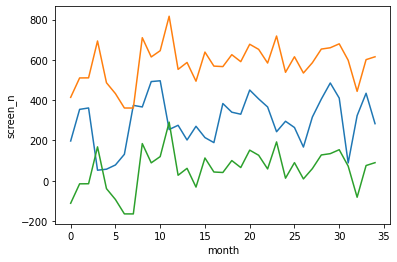

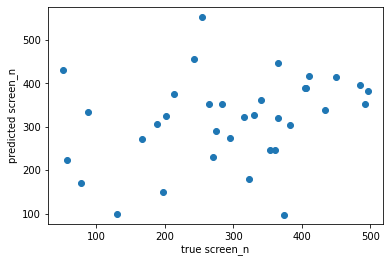

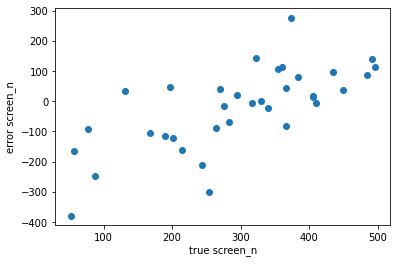

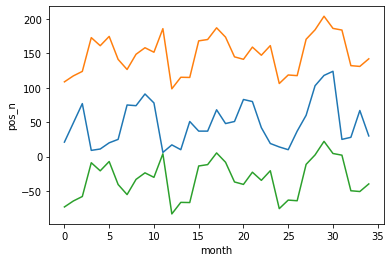

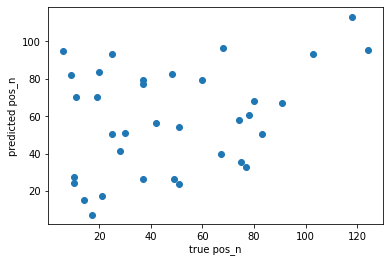

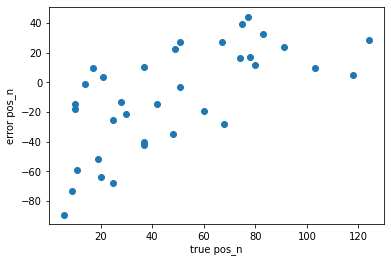

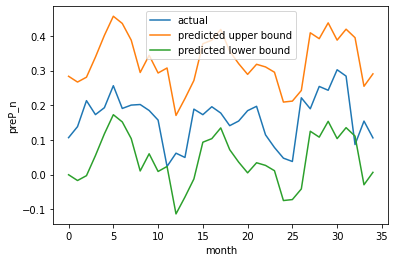

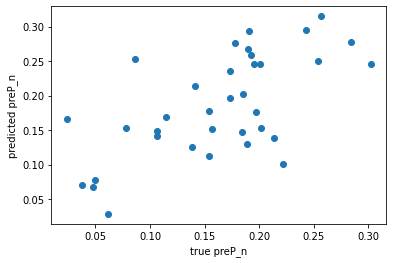

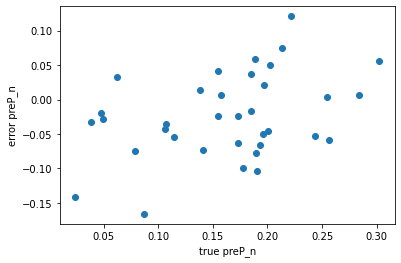

In [ ]:
pred_scaled = linearmodel.predict(x_val_scaled)
pred_test = yscaler.inverse_transform(pred_scaled)
print(np.sqrt(mean_squared_error(y_val.iloc[:, 0], pred_test[:, 0])))
print(np.sqrt(mean_squared_error(y_val.iloc[:, 1], pred_test[:, 1])))
print(np.sqrt(mean_squared_error(y_val.iloc[:, 2], pred_test[:, 2])))
save_plot(y_val, pred_test, 0, "screen_n", 'linear_screen.png', [131.42, 45.48, 0.071])
save_plot(y_val, pred_test, 1, "pos_n", 'linear_pos.png', [131.42, 45.48, 0.071])
plot(y_val, pred_test, 2, "preP_n", [131.42, 45.48, 0.071])

153.48690607345418
44.15091866879397
0.09727595888744771


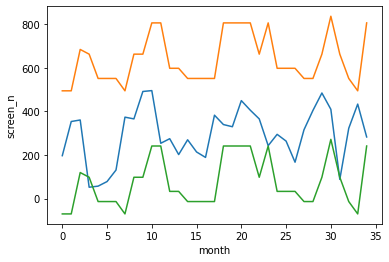

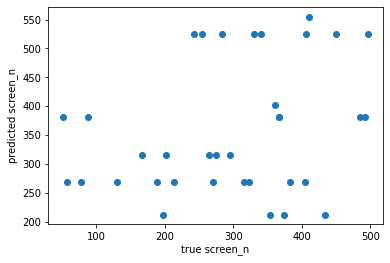

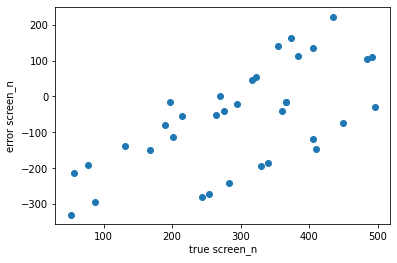

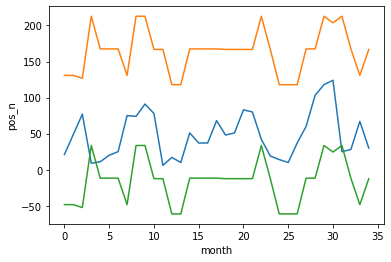

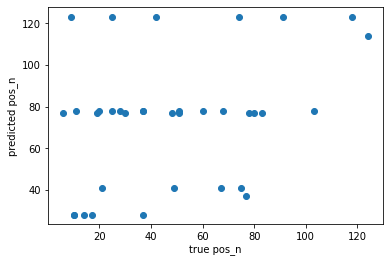

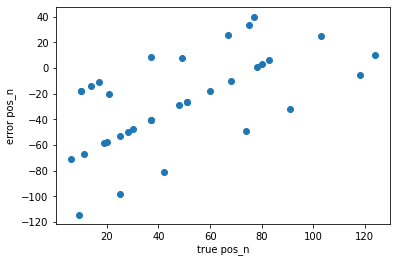

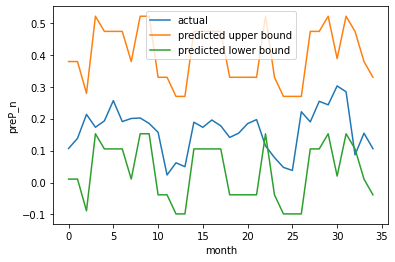

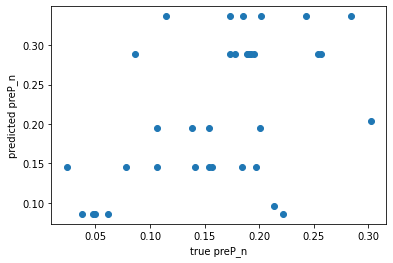

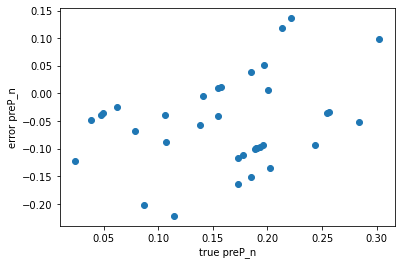

In [ ]:
pred_scaled = decision_tree_model.predict(x_val_scaled)
pred_test = yscaler.inverse_transform(pred_scaled)
print(np.sqrt(mean_squared_error(y_val.iloc[:, 0], pred_test[:, 0])))
print(np.sqrt(mean_squared_error(y_val.iloc[:, 1], pred_test[:, 1])))
print(np.sqrt(mean_squared_error(y_val.iloc[:, 2], pred_test[:, 2])))
save_plot(y_val, pred_test, 0, "screen_n",'dt_screen.png', [141.42, 44.80,0.092])
save_plot(y_val, pred_test, 1, "pos_n",'dt_pos.png', [141.42, 44.80,0.092])
plot(y_val, pred_test, 2, "preP_n", [141.42, 44.80,0.092])

148.05213755943814
34.31300468201938
0.0727908735067673


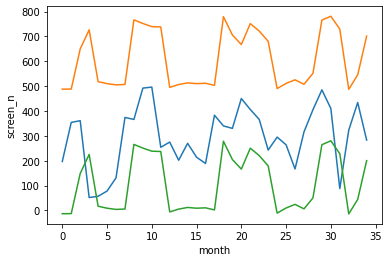

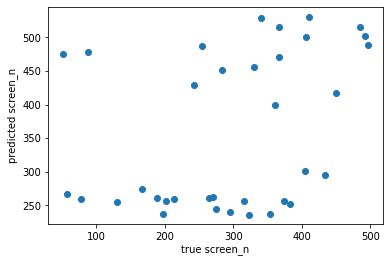

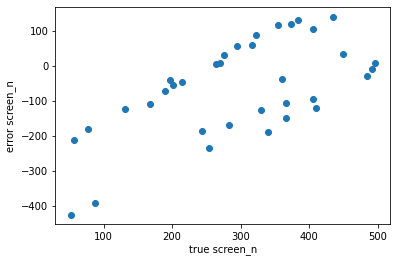

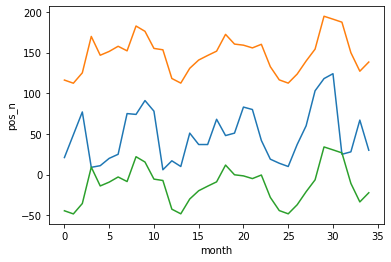

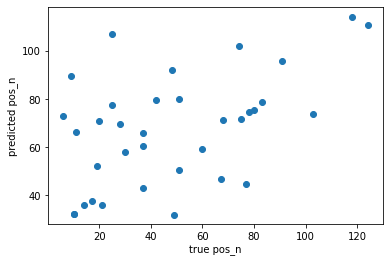

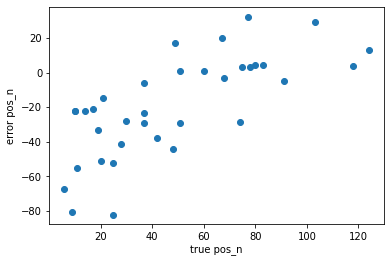

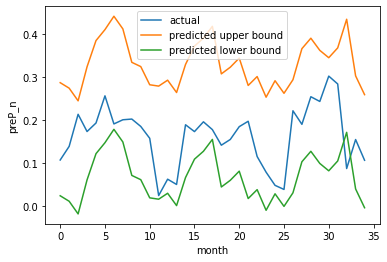

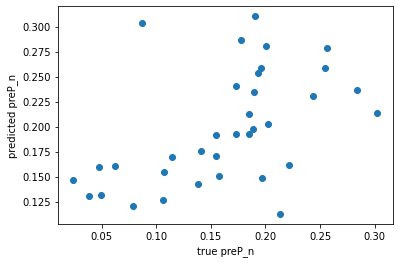

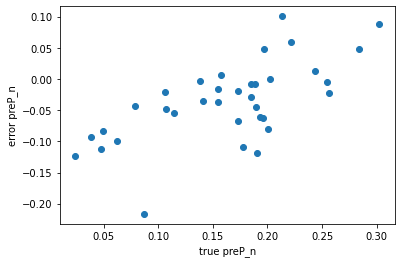

In [ ]:
pred_scaled = rf_model.predict(x_val_scaled)
pred_test = yscaler.inverse_transform(pred_scaled)
print(np.sqrt(mean_squared_error(y_val.iloc[:, 0], pred_test[:, 0])))
print(np.sqrt(mean_squared_error(y_val.iloc[:, 1], pred_test[:, 1])))
print(np.sqrt(mean_squared_error(y_val.iloc[:, 2], pred_test[:, 2])))
save_plot(y_val, pred_test, 0, "screen_n", 'rf_screen.png', [125.22, 40.14, 0.066])
save_plot(y_val, pred_test, 1, "pos_n", 'rf_pos.png', [125.22, 40.14, 0.066])
plot(y_val, pred_test, 2, "preP_n", [125.22, 40.14, 0.066])

172.22493834670883
51.39708551866871
0.0875735403990633


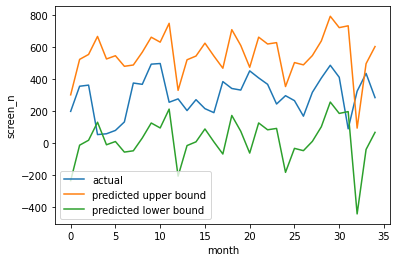

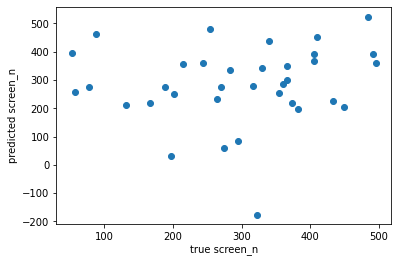

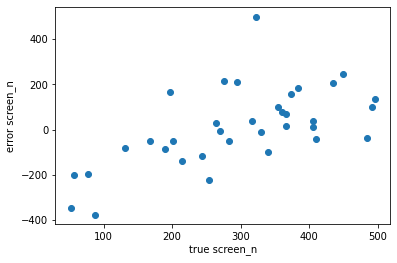

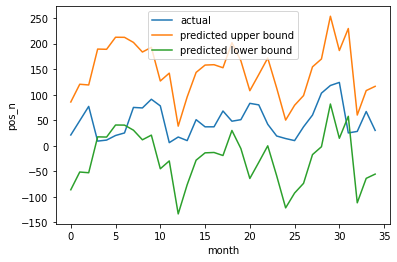

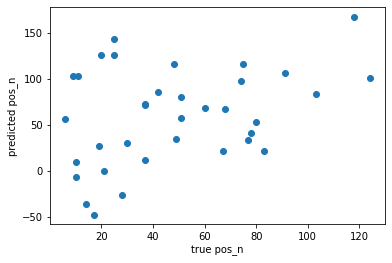

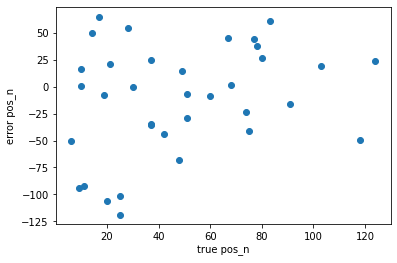

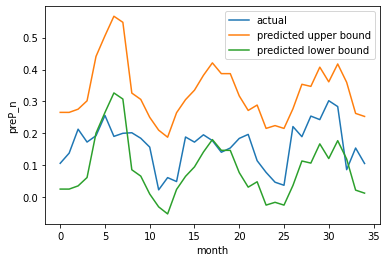

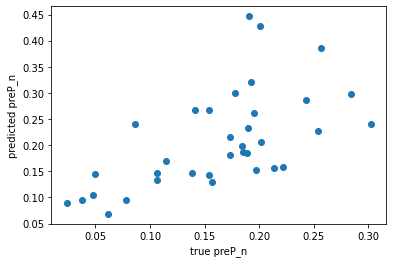

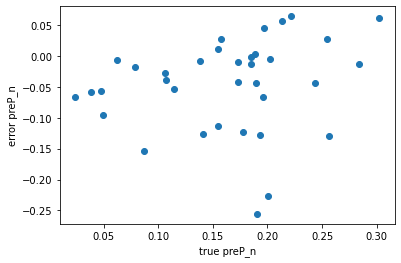

In [ ]:
pred = np.concatenate([model.predict(x_val_scaled) for model in models], axis = 1)
pred_additive = additive_model.predict(pred)
pred_test = yscaler.inverse_transform(pred_additive)
print(np.sqrt(mean_squared_error(y_val.iloc[:, 0], pred_test[:, 0])))
print(np.sqrt(mean_squared_error(y_val.iloc[:, 1], pred_test[:, 1])))
print(np.sqrt(mean_squared_error(y_val.iloc[:, 2], pred_test[:, 2])))
plot(y_val, pred_test, 0, "screen_n")
plot(y_val, pred_test, 1, "pos_n")
plot(y_val, pred_test, 2, "preP_n")

131.8570705022355
35.230173523245995
0.06459560566258024


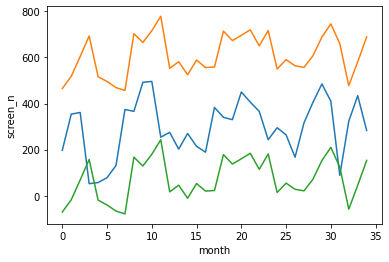

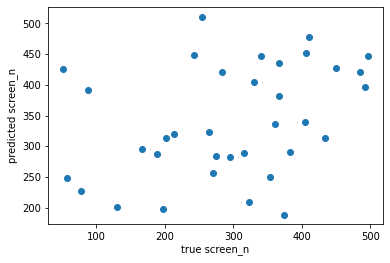

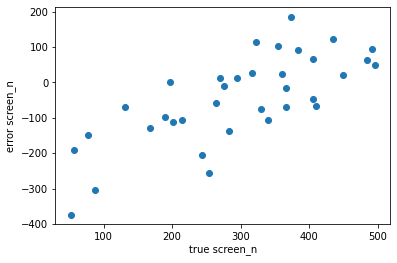

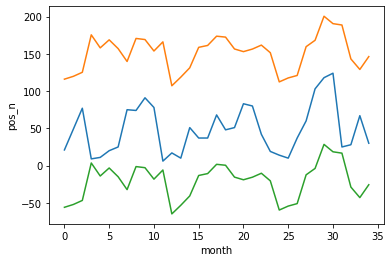

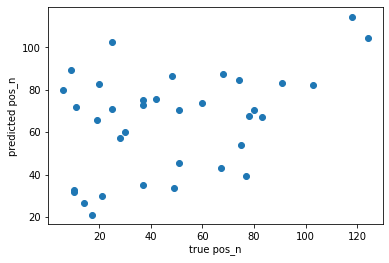

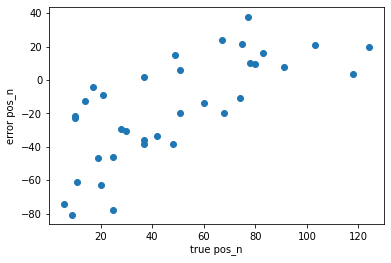

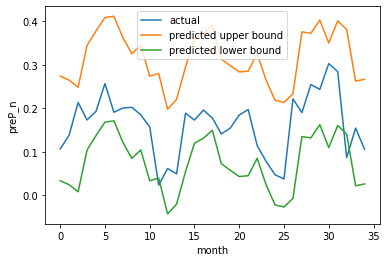

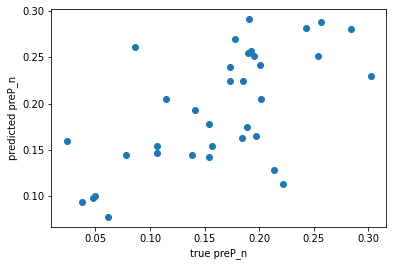

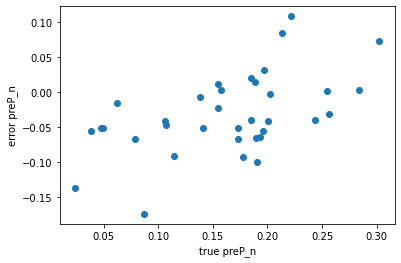

In [ ]:
pred = np.concatenate([model.predict(x_val_scaled).reshape(1, -1, 3) for model in models])
pred_test = yscaler.inverse_transform(pred.mean(axis = 0))
print(np.sqrt(mean_squared_error(y_val.iloc[:, 0], pred_test[:, 0])))
print(np.sqrt(mean_squared_error(y_val.iloc[:, 1], pred_test[:, 1])))
print(np.sqrt(mean_squared_error(y_val.iloc[:, 2], pred_test[:, 2])))
save_plot(y_val, pred_test, 0, "screen_n", 'additive_screen.png')
save_plot(y_val, pred_test, 1, "pos_n", 'additive_pos.png')
plot(y_val, pred_test, 2, "preP_n")